<center><h1>Lab3: Polynomial regression</h1></center>

$\newcommand{\x}{\mathbf{x}}\newcommand{\w}{\mathbf{w}}\newcommand{\c}{\mathcal{C}}\newcommand{\wx}{\w^\top\x}\newcommand{\class}{\c}$


|  Information  |  Your answer  |
|-----------|:---------------------------------|
| **Group** | 185 |
| **Name 1** | liruiyuan |
| **Name 2** | *Fill in your names here* |
| **Name 3** | *Fill in your names here* |


# Preliminaries

As we have seen in the lecture, linear regression models and gradient descent based optimization methods are at the core of artificial neural networks. Complementary to Lab 2, logistic regression, in this lab we will study gradient descent in the context of linear regression to master its behaviour and to understand how to implement it from scratch. The lab wants to develop the intuitions on how to approach this problem, so very little information are given, and there is space for a flexible approach. It is strongly advisable to implement the required formulas yourself and to avoid using standard machine learning libraries (e.g. Scikit-learn).

## The problem

You are requested to perform polynomial regression (the formulas are given below) on the data collected from a Combined Cycle Power Plant. The data can be found in Canvas in the "lab3_data.csv" file. It contains five columns. The first column represents the Temperature (the input data - X) on the Celsius scale and the fifth column represents the Net hourly electrical energy output (the output data - Y) in MW. Each row represents a data point. Please note that you don't need columns 2,3, and 4 to solve the assignment.

Regression model: $h_\mathbf{\theta}(\mathbf{x})=\theta_0x^2+\theta_1x+\theta_2\text{, where }\theta_2,\theta_1, \theta_0,\text{ are the model parameters}$

Cost function: $J(\theta)=\frac{1}{2n}\sum_{i=1}^{n}(h_\theta(\mathbf{x}^{(i)})-y^{(i)})^2$ , where $i$ iterates over all data points, $\mathbf{x}^{(i)}$ represents the input of a data point $(i)$, and $\mathbf{y}^{(i)}$ represents the true output of a data point $(i)$.

Optimization method: Gradient descent

Data normalization: Standard score normalization (see https://en.wikipedia.org/wiki/Normalization_(statistics))

## Let's start

First, let us set things up; import the libraries we will need, and load the data to be used later.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt("lab3_data.csv",delimiter=",")
x = data[10:20,0]
y = data[10:20,4]
print(x)
print(y)


[28.28 22.99 29.3   8.14 16.92 22.72 18.14 11.49  9.94 23.54]
[435.29 451.41 426.25 480.66 460.17 453.13 461.71 471.08 473.74 448.56]


## Question 1 : 
In the following function implement a polynomial regression model as specified above in "The problem" section. Auxilliary, the function would need to print during training at every 10 iterations, the iteration number, the loss value, the parameter values, and a plot with the obtained regression line at that particular iteration. 

50.38546400000001
259.844780000014
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
iteration number 0
loss value 1.6199333233803135
alpha 0.01
parameter [0.753908316979764, 0.4463763980403577, 0.20335962800098067]


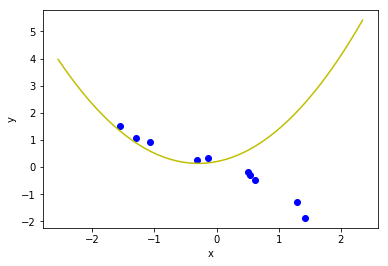

iteration number 10
loss value 1.1158959940073945
alpha 0.01
parameter [0.566039618922535, 0.29407082073936197, 0.08977914545991543]


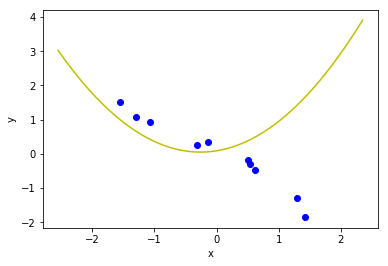

iteration number 20
loss value 0.8480328210320592
alpha 0.01
parameter [0.4724993476058221, 0.16935658188716757, 0.008906356803180516]


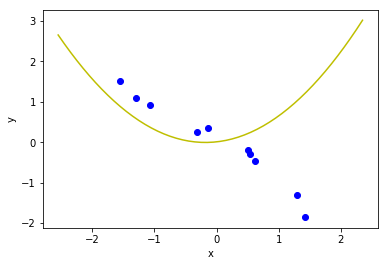

iteration number 30
loss value 0.6743889556310709
alpha 0.01
parameter [0.4045329463036749, 0.06277631086924298, -0.03270178118878744]


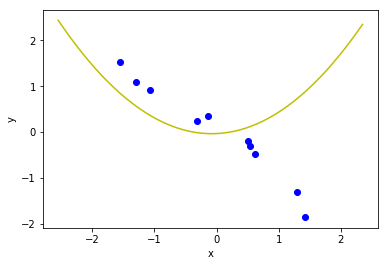

iteration number 40
loss value 0.41836605184921544
alpha 0.01
parameter [0.24079510930895268, -0.11686246532005216, -0.11571342011257393]


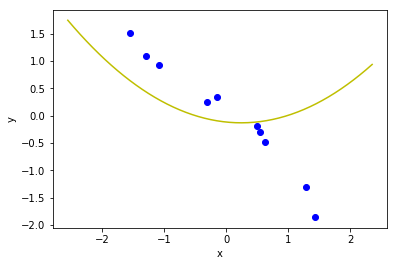

iteration number 50
loss value 0.32312404633378705
alpha 0.01
parameter [0.16955321380926305, -0.21662072463567145, -0.1487336615173226]


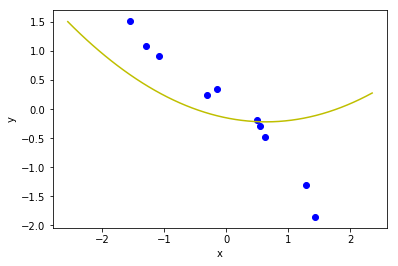

iteration number 60
loss value 0.28048276992634824
alpha 0.01
parameter [0.18458940929087778, -0.282099077852554, -0.13458444773159817]


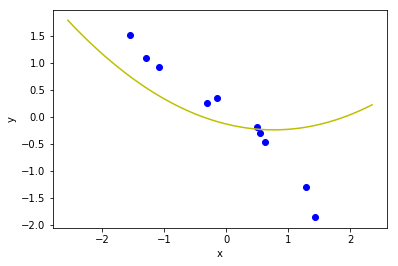

iteration number 70
loss value 0.21722259144062225
alpha 0.01
parameter [0.13852733547487267, -0.3718728316425227, -0.16163700293098093]


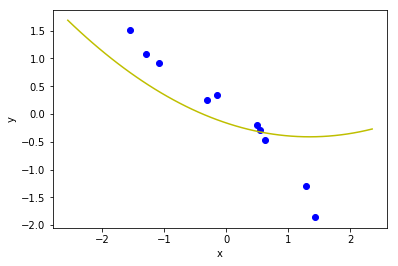

iteration number 80
loss value 0.1809206969019553
alpha 0.01
parameter [0.13714980899536613, -0.4378081789728309, -0.16381760710443724]


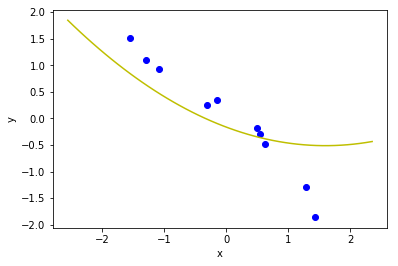

iteration number 90
loss value 0.15726221054988643
alpha 0.01
parameter [0.15607656344406493, -0.49138404154002313, -0.14975434627478562]


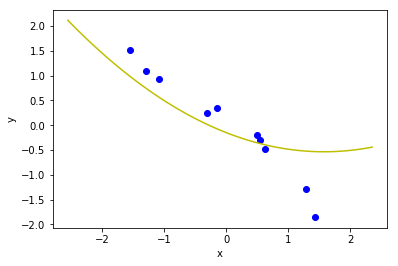

iteration number 100
loss value 0.1472967877865688
alpha 0.01
parameter [0.17650036373203243, -0.5240669055792034, -0.13145888186836235]


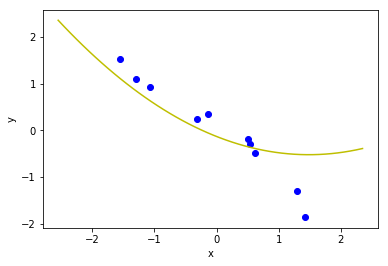

iteration number 110
loss value 0.12286127281118081
alpha 0.01
parameter [0.1261832895335778, -0.5617791727346146, -0.1508048388077957]


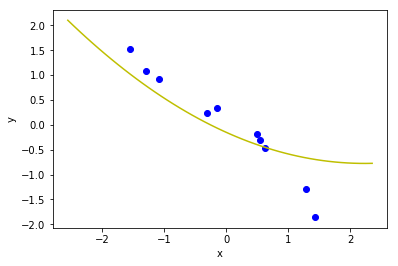

iteration number 120
loss value 0.12101719575073748
alpha 0.01
parameter [0.1683506155878193, -0.5866903617015107, -0.1275748581367507]


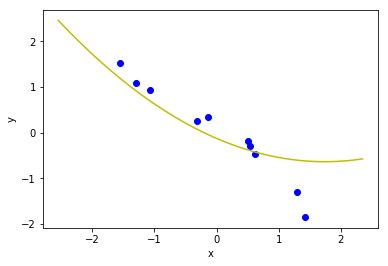

iteration number 130
loss value 0.08921238052824931
alpha 0.01
parameter [0.09438956031794939, -0.6471256029625224, -0.14895333545904405]


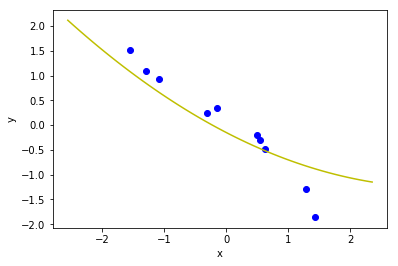

iteration number 140
loss value 0.08088562494409662
alpha 0.01
parameter [0.09735874566348592, -0.6741351955649358, -0.13834820171487555]


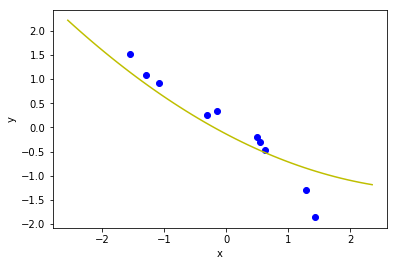

iteration number 150
loss value 0.07350939793917571
alpha 0.01
parameter [0.10114425656978852, -0.7013983561197872, -0.1264420506019711]


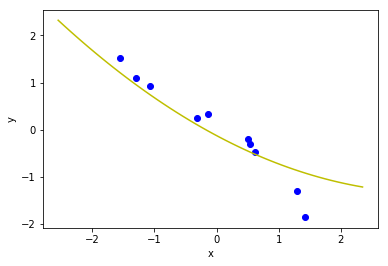

iteration number 160
loss value 0.07435544972020558
alpha 0.01
parameter [0.11500142757781688, -0.7055776332396668, -0.1090164007932279]


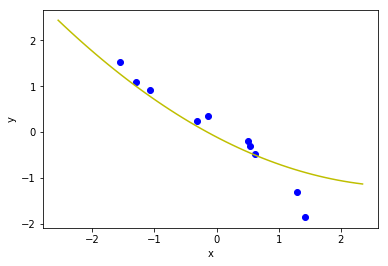

iteration number 170
loss value 0.07222475674352596
alpha 0.01
parameter [0.11899516382922876, -0.717534212606107, -0.10129267266679098]


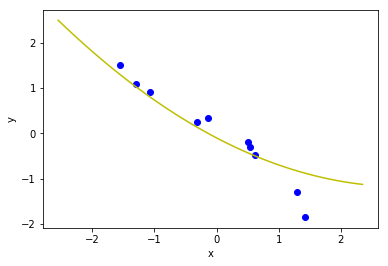

iteration number 180
loss value 0.06601752908614829
alpha 0.01
parameter [0.1088717734413188, -0.7366984761623264, -0.09698762826784305]


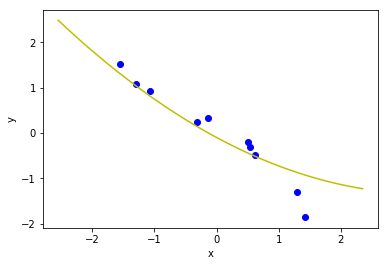

iteration number 190
loss value 0.05632179401064049
alpha 0.01
parameter [0.08369224741664105, -0.7641350833736176, -0.10079181187092509]


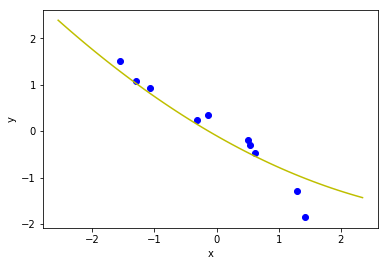

In [63]:
def polynomial_regression(x,y,normalization,alpha,initial_theta,max_iterations):
    # x - input data
    # y - output data
    # normalization - boolean value to normalize the data or not
    # alpha - learning rate
    # initial_theta - initial values of the parameters
    # max_iterations - number of iterations
    
    # Your CODE for Question 1shall be implemented here
    import matplotlib.pyplot as plt
    import random
    import numpy
    import math
    new_theta=initial_theta

    # normalization
    import numpy
    xarray=numpy.array(x)
    yarray=numpy.array(y)
    if normalization==True:
        sum1=xarray.sum()
        xarray2=xarray*xarray
        sum2=xarray2.sum()
        meanx=sum1/len(x)
        varx=sum2/len(x)-meanx**2 #LEFT=(sum((x-u)^2)/N)
        xarray=xarray-meanx
        xarray=xarray/(varx**0.5)
        sum1=yarray.sum()
        yarray2=yarray*yarray
        sum2=yarray2.sum()
        meany=sum1/len(y)
        vary=(sum2/len(y)-meany**2) #LEFT=(sum((x-u)^2)/N)
        yarray=yarray-meany
        print(varx)
        print(vary)
        yarray=yarray/(vary**0.5)

    xmin=xarray.min()
    xmax=xarray.max()
    print(yarray)
    print(xarray)

    for i in range(max_iterations):
        index=int(random.random()*len(x))
        x_s=xarray[index]
        y_s=yarray[index]
        htheta=x_s*x_s*new_theta[0]+x_s*new_theta[1]+new_theta[2]
        t0=alpha*x_s*x_s*(htheta-y_s)
        t1=alpha*x_s*(htheta-y_s)
        t2=alpha*(htheta-y_s)
        new_theta[0]-=t0
        new_theta[1]-=t1
        new_theta[2]-=t2
        # this is batch gradience regression  kind of slow
        # loss=0
        # jtheta=0
        # t0=0
        # t1=0
        # t2=0
        # for index in range(len(x)):
        #     x_s=xarray[index]
        #     y_s=yarray[index]
        #     htheta=x_s*x_s*new_theta[0]+x_s*new_theta[1]+new_theta[2]
        #     jtheta+=pow((htheta-y_s),2)/2.0/len(x)
        #     #loss+=(htheta-y_s)
        #     t0+=alpha*x_s*x_s*(htheta-y_s)
        #     t1+=alpha*x_s*(htheta-y_s)
        #     t2+=alpha*(htheta-y_s)
        #     #print(loss)

        if i%10==0:
            jtheta=0
            for i_loss in range(len(x)):
                x_s=xarray[i_loss]
                y_s=yarray[i_loss]
                htheta=x_s*x_s*new_theta[0]+x_s*new_theta[1]+new_theta[2]
                jtheta+=pow((htheta-y_s),2)/2.0/len(x)
            print("iteration number",i)
            print("loss value",jtheta)
            print("alpha",alpha)
            print("parameter",new_theta)
            #xlist = np.arange(-t1/(2*t0)-5,-t1/(2*t0)+5,0.5)
            xlist = np.arange(xmin-1,xmax+1,0.1)
            ylist=xlist*xlist*new_theta[0]+xlist*new_theta[1]+new_theta[2]
            plt.scatter(xarray,yarray,c='b')
            plt.plot(xlist,ylist,c='y')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()

polynomial_regression(x,y,True,0.01,[0.75,0.45,0.2],200)
#plt.show()


## Question 2
Run the code below and check the results of your implementation.

50.38546400000001
259.844780000014
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
iteration number 0
loss value 1.6160147198181984
parameter [0.73614447 0.43694949 0.1905    ]


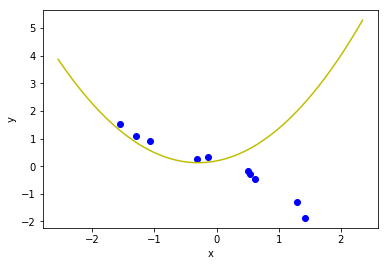

iteration number 10
loss value 1.2305491365265309
parameter [0.61357647 0.3122936  0.10748648]


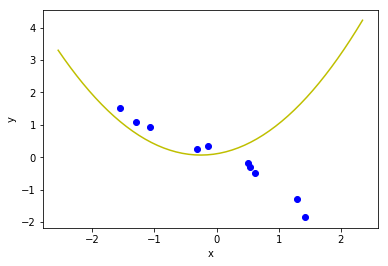

iteration number 20
loss value 0.9546776142718322
parameter [0.515593   0.19784498 0.04300552]


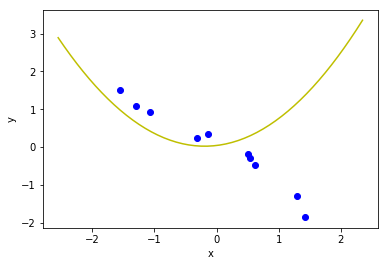

iteration number 30
loss value 0.7529377850737408
parameter [ 0.43688465  0.09296821 -0.00682265]


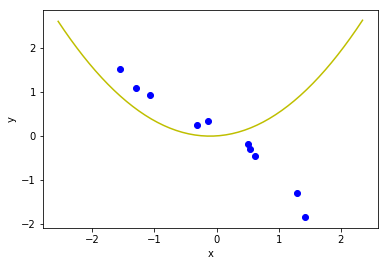

iteration number 40
loss value 0.6023693799463726
parameter [ 0.37330025 -0.00298482 -0.04505215]


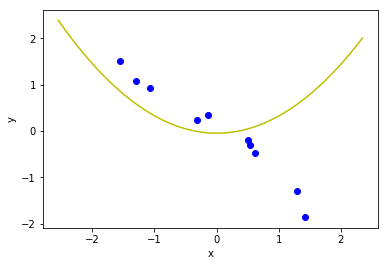

iteration number 50
loss value 0.4878844709752595
parameter [ 0.32159388 -0.09065771 -0.07408958]


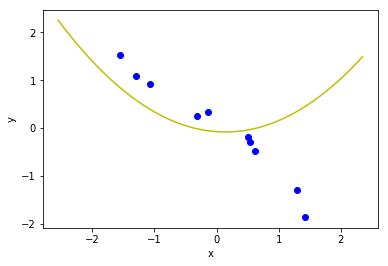

iteration number 60
loss value 0.3993967038068822
parameter [ 0.27922711 -0.17067742 -0.09583346]


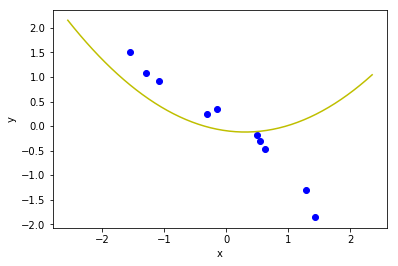

iteration number 70
loss value 0.33003271645326665
parameter [ 0.24421452 -0.24364612 -0.11178333]


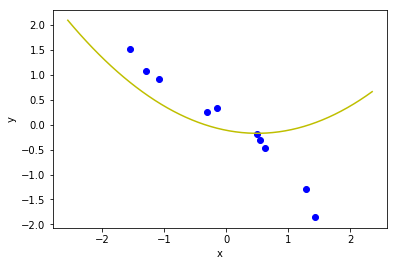

iteration number 80
loss value 0.2750109398764634
parameter [ 0.21500292 -0.31013585 -0.12312533]


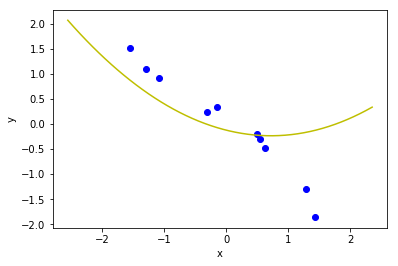

iteration number 90
loss value 0.23093325974977938
parameter [ 0.19037691 -0.37068549 -0.13079912]


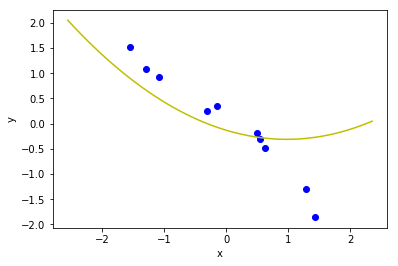

iteration number 100
loss value 0.19533312947656306
parameter [ 0.16938519 -0.42579919 -0.13555037]


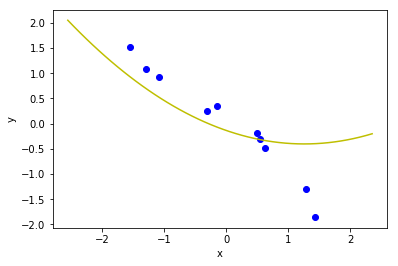

iteration number 110
loss value 0.16638382232970023
parameter [ 0.15128288 -0.47594608 -0.13797195]


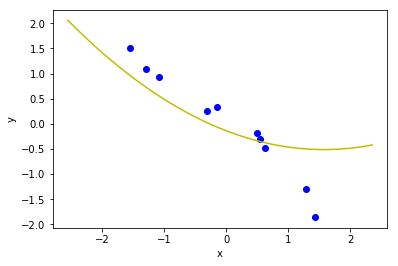

iteration number 120
loss value 0.1427073591782307
parameter [ 0.13548642 -0.52156075 -0.1385362 ]


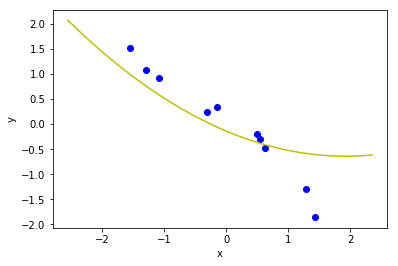

iteration number 130
loss value 0.1232472708517988
parameter [ 0.12153845 -0.5630443  -0.13762028]


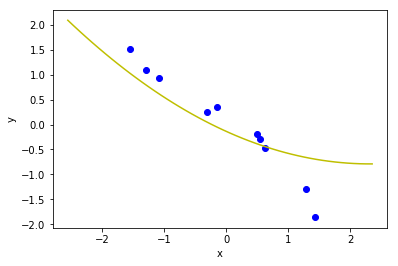

iteration number 140
loss value 0.10718226664363302
parameter [ 0.10908018 -0.60076584 -0.13552605]


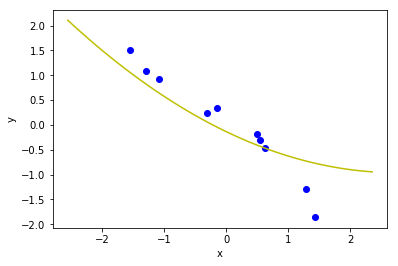

iteration number 150
loss value 0.09386645561802968
parameter [ 0.09782998 -0.63506415 -0.13249574]


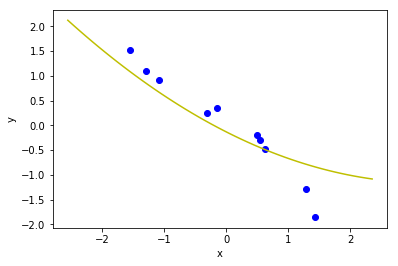

iteration number 160
loss value 0.08278706849175099
parameter [ 0.08756648 -0.66624951 -0.12872425]


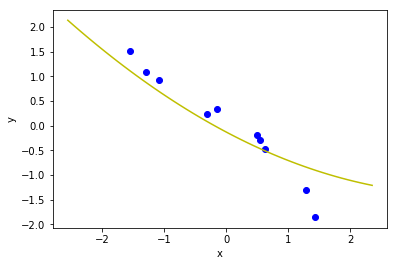

iteration number 170
loss value 0.07353391765440705
parameter [ 0.0781155  -0.69460563 -0.12436883]


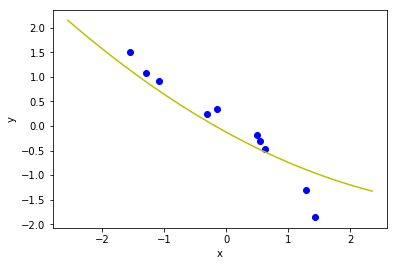

iteration number 180
loss value 0.06577688475436483
parameter [ 0.06933974 -0.72039149 -0.11955674]


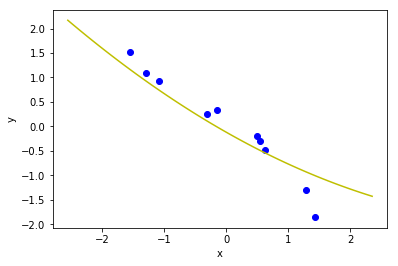

iteration number 190
loss value 0.059249013289606356
parameter [ 0.06113078 -0.74384322 -0.11439125]


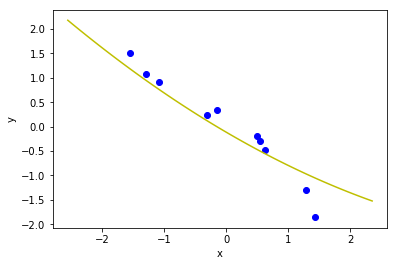

In [56]:
alpha=0.01 #learning rate
normalization=True #boolean value to normalize the data or not
initial_theta=np.asarray([0.75,0.45,0.2]) #initial values of the parameters
max_iterations=100 #number of iterations

polynomial_regression(x,y,normalization,alpha,initial_theta,max_iterations) #the function which has to be implemented by you 






## Question 3:##
After your polynomial regression implementation works fine, run the following code which does not perform normalization of the input data. Just study the learning behaviour in this case and in the case where the data is normalized.





[435.29 451.41 426.25 480.66 460.17 453.13 461.71 471.08 473.74 448.56]
[28.28 22.99 29.3   8.14 16.92 22.72 18.14 11.49  9.94 23.54]
iteration number 0
loss value 33121.11021779706
parameter [-23.28700313  10.85305319   1.54668215]


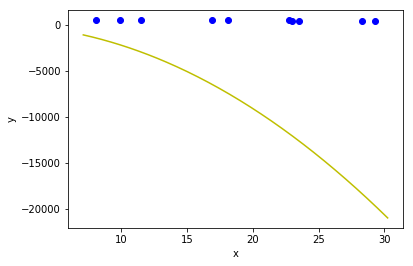

iteration number 10
loss value 7.130190025430412e+68
parameter [-1.86891009e+35 -7.51387530e+33 -3.17963982e+32]


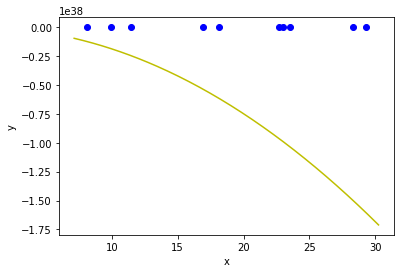

iteration number 20
loss value 4.4833998192933155e+136
parameter [-1.48197743e+69 -5.95822866e+67 -2.52133824e+66]


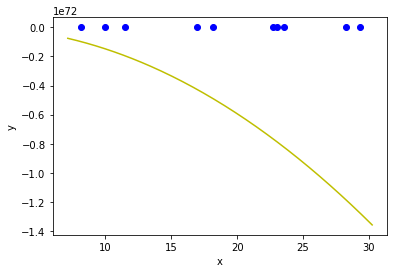

iteration number 30
loss value 2.8191217720632816e+204
parameter [-1.17515397e+103 -4.72465769e+101 -1.99932913e+100]


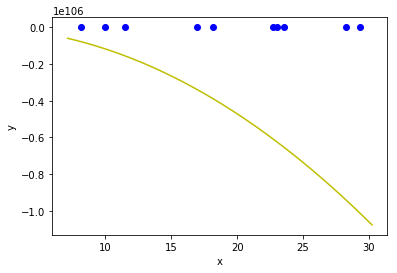

iteration number 40
loss value 1.7726385970577845e+272
parameter [-9.31854177e+136 -3.74648098e+135 -1.58539497e+134]


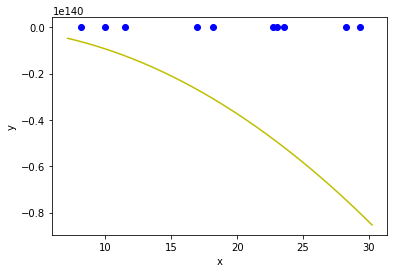

iteration number 50
loss value inf
parameter [-7.38926325e+170 -2.97082257e+169 -1.25716030e+168]


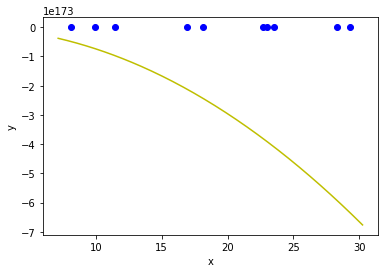

iteration number 60
loss value inf
parameter [-5.85941585e+204 -2.35575378e+203 -9.96882199e+201]


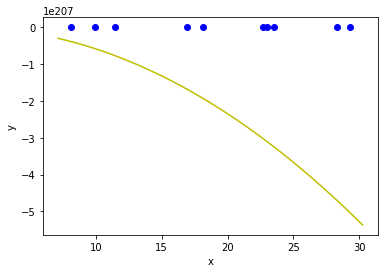

iteration number 70
loss value inf
parameter [-4.64630275e+238 -1.86802670e+237 -7.90491172e+235]


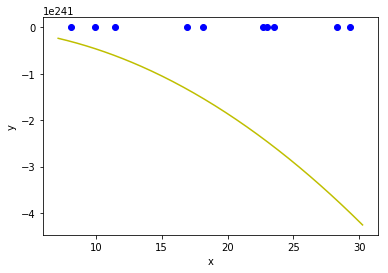

iteration number 80
loss value inf
parameter [-3.68434837e+272 -1.48127694e+271 -6.26830625e+269]


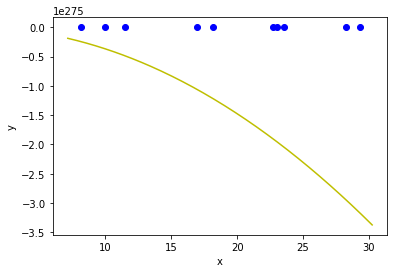

iteration number 90
loss value inf
parameter [-2.92155368e+306 -1.17459851e+305 -4.97053790e+303]


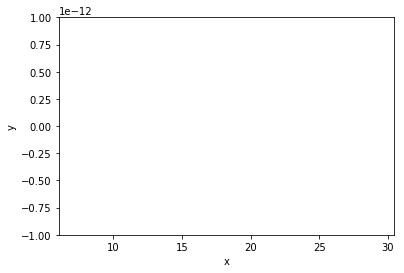

In [57]:
alpha=0.01
normalization=False 
initial_theta=np.asarray([0.75,0.45,0.2])
max_iterations=100

polynomial_regression(x,y,normalization,alpha,initial_theta,max_iterations)

## Question 4: ##
After your polynomial regression implementation works fine, run the following code which studies different learning rate values. Just looked over the results and see the differences.

50.38546400000001
259.844780000014
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
iteration number 0
loss value 2.5299299117668888
alpha 1
parameter [1.25979308 0.12121117 0.41205093]


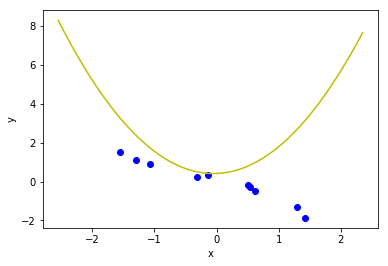

iteration number 10
loss value 54291.62790406895
alpha 1
parameter [ 182.5827645  -191.93605861    9.26523759]


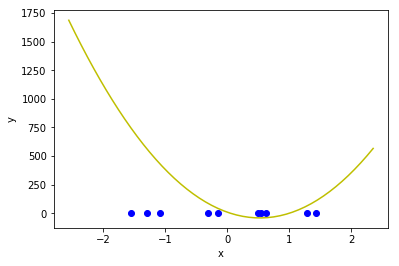

iteration number 20
loss value 514186480.1443768
alpha 1
parameter [ 14769.58856819 -10618.70881287  11837.17651726]


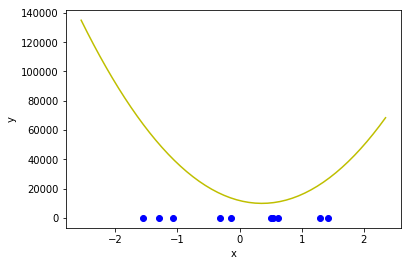

iteration number 30
loss value 102738674649.37119
alpha 1
parameter [ 541481.74234662   99732.93293498 -585284.5946038 ]


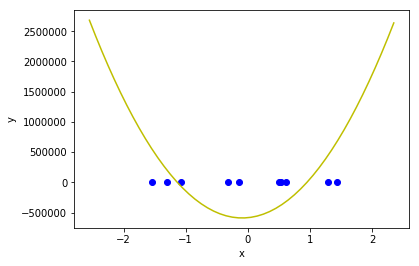

iteration number 40
loss value 18270532598910.543
alpha 1
parameter [ 5194608.23119464  4475763.83167434 -7338887.40865113]


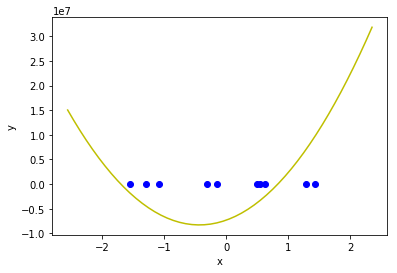

iteration number 50
loss value 2.0278110151380576e+16
alpha 1
parameter [-7.29922665e+07  1.54918791e+08 -2.22259374e+07]


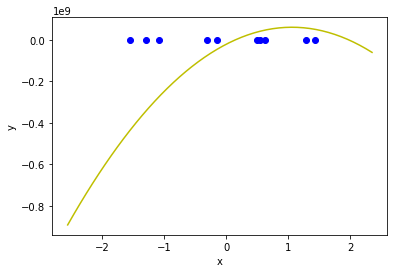

iteration number 60
loss value 1.059222860012177e+20
alpha 1
parameter [-1.51641942e+10  2.68166606e+09  1.00674626e+10]


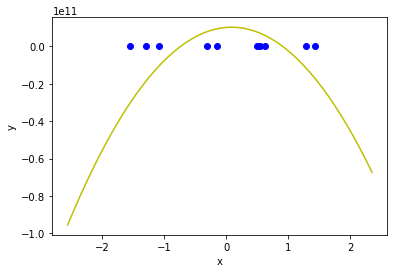

iteration number 70
loss value 8.969305990285797e+23
alpha 1
parameter [ 1.07991215e+12 -5.02943566e+11 -3.54746271e+11]


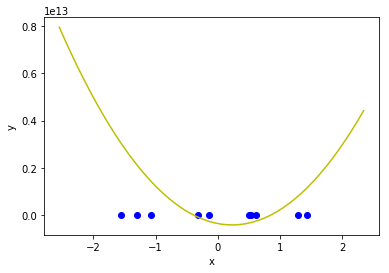

iteration number 80
loss value 5.982868220702629e+28
alpha 1
parameter [ 1.86226458e+14 -1.23590084e+14  8.20634532e+13]


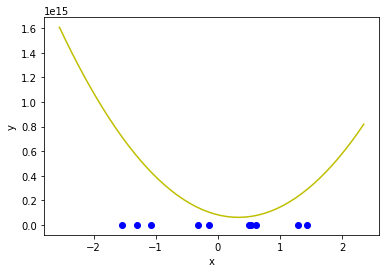

iteration number 90
loss value 7.09168106642634e+30
alpha 1
parameter [ 2.69308439e+15 -1.07567743e+15 -7.21867861e+13]


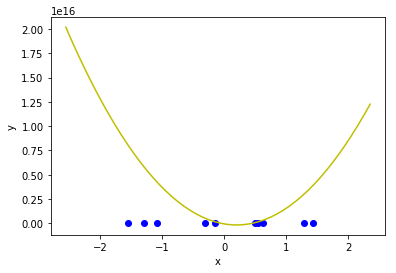

50.38546400000001
259.844780000014
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
iteration number 0
loss value 1.6519606073436908
alpha 0.1
parameter [0.7853564  0.4227385  0.22101994]


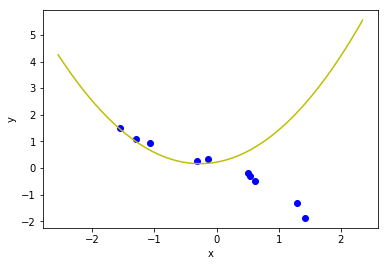

iteration number 10
loss value 0.32749064520055826
alpha 0.1
parameter [ 0.01744272 -0.2620783  -0.32954704]


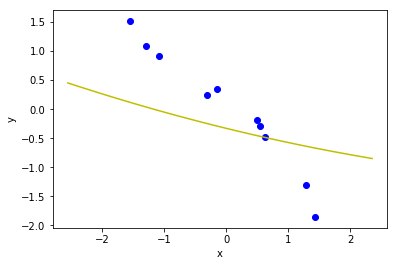

iteration number 20
loss value 0.052563235650922545
alpha 0.1
parameter [ 0.12575149 -0.86036036 -0.20549074]


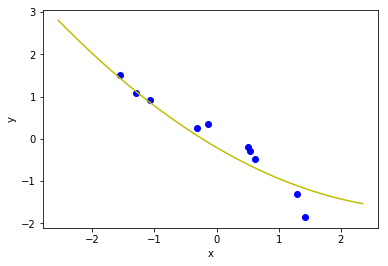

iteration number 30
loss value 0.05818515442672606
alpha 0.1
parameter [ 0.12797338 -0.79637019 -0.10700189]


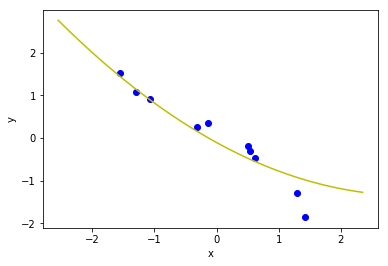

iteration number 40
loss value 0.028116706198205287
alpha 0.1
parameter [ 0.03057803 -0.99822993 -0.01632051]


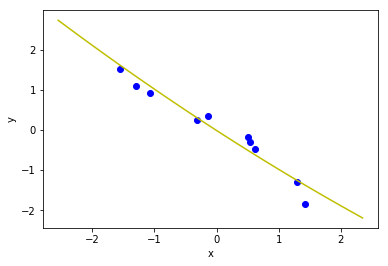

iteration number 50
loss value 0.02477826298560953
alpha 0.1
parameter [-0.13533571 -1.01326279 -0.01899233]


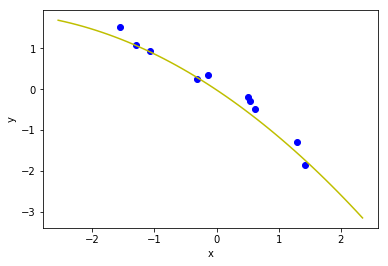

iteration number 60
loss value 0.017134906612655394
alpha 0.1
parameter [-0.08745227 -1.05154163  0.06899403]


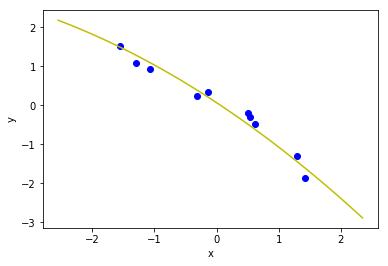

iteration number 70
loss value 0.01786829171596433
alpha 0.1
parameter [-0.07347835 -1.03135453  0.11488266]


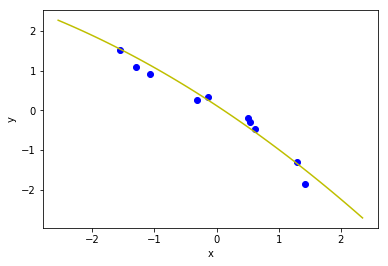

iteration number 80
loss value 0.01789821093666059
alpha 0.1
parameter [-0.07066142 -0.97941645  0.12675449]


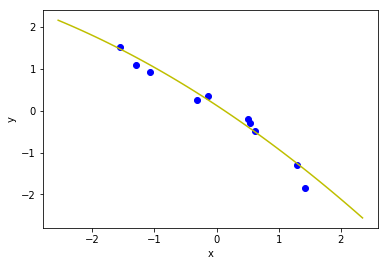

iteration number 90
loss value 0.024597490797227856
alpha 0.1
parameter [-0.05609812 -0.95812574  0.17220556]


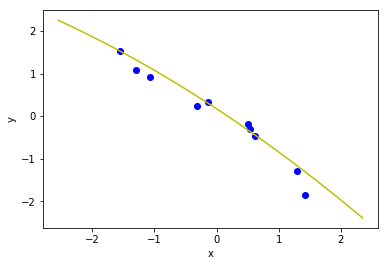

50.38546400000001
259.844780000014
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
iteration number 0
loss value 1.6199333233803135
alpha 0.01
parameter [0.75390832 0.4463764  0.20335963]


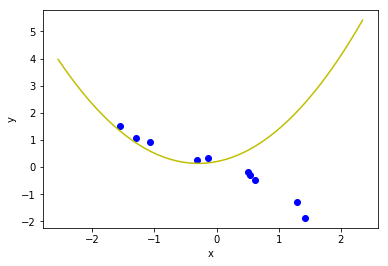

iteration number 10
loss value 1.0785942635468997
alpha 0.01
parameter [0.55278574 0.27215485 0.09169567]


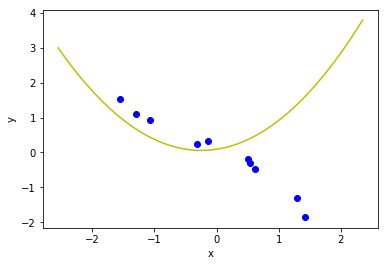

iteration number 20
loss value 0.689583324599765
alpha 0.01
parameter [ 0.34692987  0.10550446 -0.01652196]


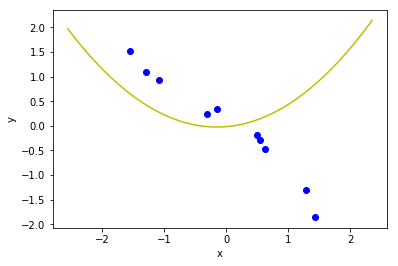

iteration number 30
loss value 0.5846891337306197
alpha 0.01
parameter [ 0.31302915  0.02232857 -0.03589268]


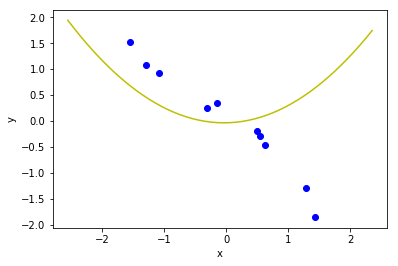

iteration number 40
loss value 0.5260097944558504
alpha 0.01
parameter [ 0.34083507 -0.05569167 -0.04174624]


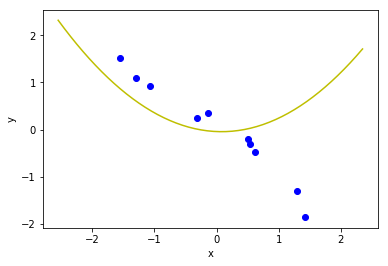

iteration number 50
loss value 0.48214955535714066
alpha 0.01
parameter [ 0.35558231 -0.11672302 -0.04472101]


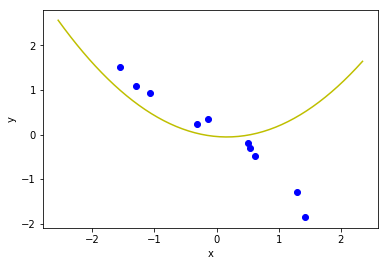

iteration number 60
loss value 0.4418155077403264
alpha 0.01
parameter [ 0.34969427 -0.16394072 -0.04570539]


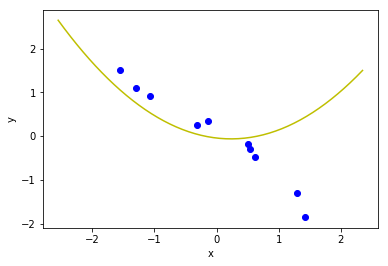

iteration number 70
loss value 0.3964809078543879
alpha 0.01
parameter [ 0.33918563 -0.21123546 -0.06303773]


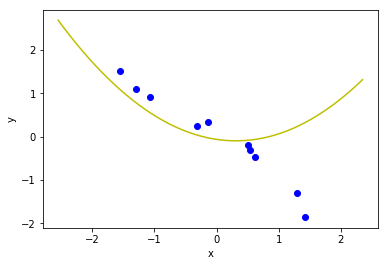

iteration number 80
loss value 0.3617895772891389
alpha 0.01
parameter [ 0.32026067 -0.2451275  -0.06895857]


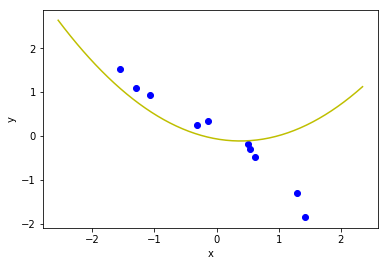

iteration number 90
loss value 0.3129305966207541
alpha 0.01
parameter [ 0.28562633 -0.29217968 -0.07744857]


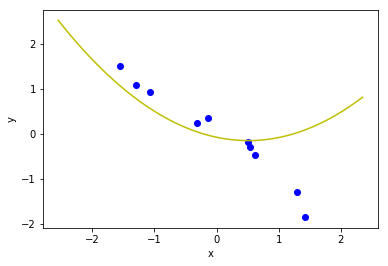

50.38546400000001
259.844780000014
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
iteration number 0
loss value 1.6161658045578433
alpha 0.001
parameter [0.75000383 0.449973   0.20019053]


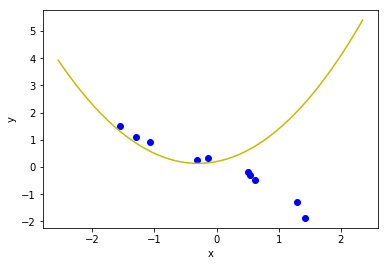

iteration number 10
loss value 1.5908063643635066
alpha 0.001
parameter [0.74393185 0.44199171 0.19318971]


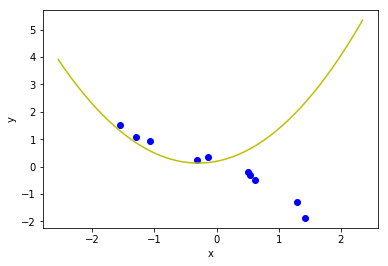

iteration number 20
loss value 1.5358472818144868
alpha 0.001
parameter [0.72562293 0.42596131 0.18285236]


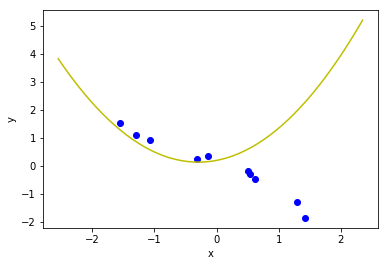

iteration number 30
loss value 1.479600956238704
alpha 0.001
parameter [0.70691874 0.40960066 0.17071534]


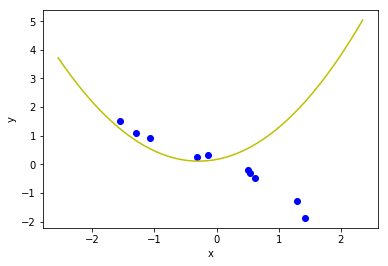

iteration number 40
loss value 1.4395830978466555
alpha 0.001
parameter [0.69492827 0.39612511 0.16186937]


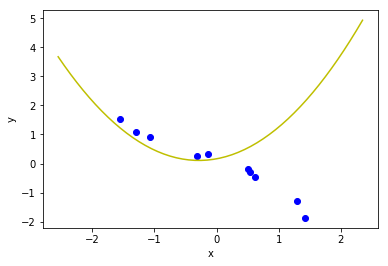

iteration number 50
loss value 1.4321622499882172
alpha 0.001
parameter [0.69411385 0.39320548 0.15868696]


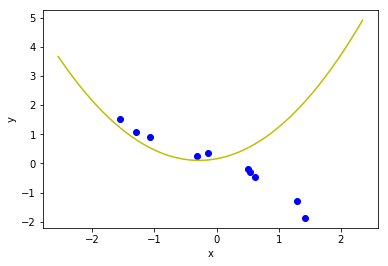

iteration number 60
loss value 1.4175919825870327
alpha 0.001
parameter [0.69134684 0.38617746 0.1559967 ]


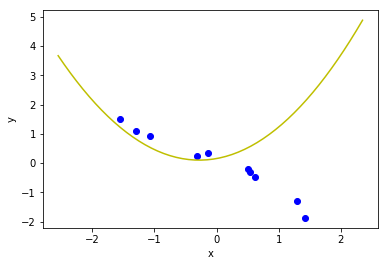

iteration number 70
loss value 1.402397769394124
alpha 0.001
parameter [0.68932602 0.37842903 0.15243294]


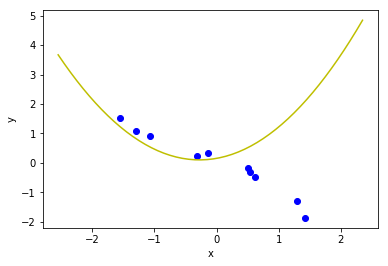

iteration number 80
loss value 1.3788621040457953
alpha 0.001
parameter [0.68246379 0.36953827 0.1476194 ]


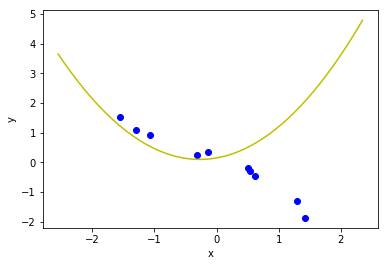

iteration number 90
loss value 1.3628991815844527
alpha 0.001
parameter [0.67895315 0.36241616 0.14413105]


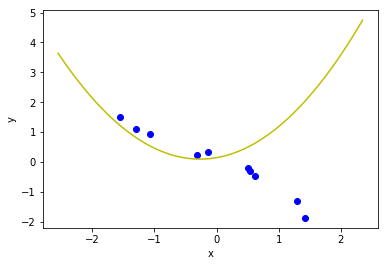

50.38546400000001
259.844780000014
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
iteration number 0
loss value 1.6160625949119944
alpha 0.0001
parameter [0.75005098 0.44996712 0.20002121]


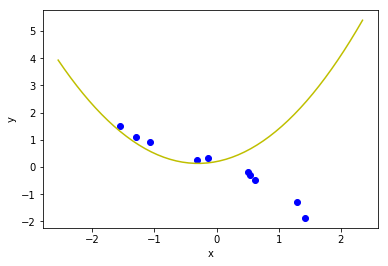

iteration number 10
loss value 1.6095823765122994
alpha 0.0001
parameter [0.74783161 0.44820374 0.19885064]


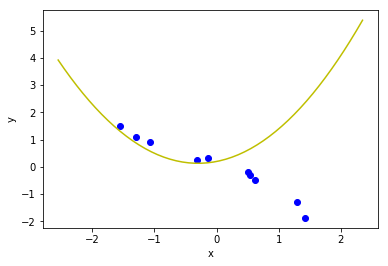

iteration number 20
loss value 1.6091890897092584
alpha 0.0001
parameter [0.74794434 0.44789729 0.19869269]


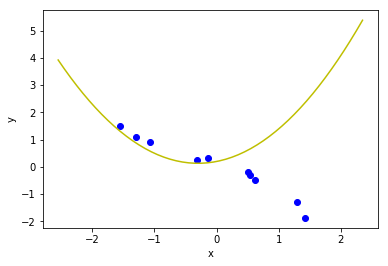

iteration number 30
loss value 1.6016365153237744
alpha 0.0001
parameter [0.74544665 0.44578626 0.19725259]


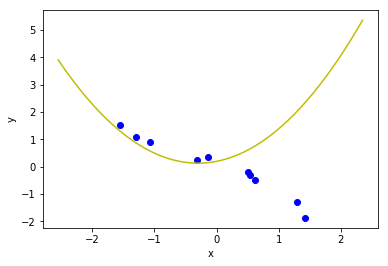

iteration number 40
loss value 1.5929425514064512
alpha 0.0001
parameter [0.74250444 0.44334008 0.19568505]


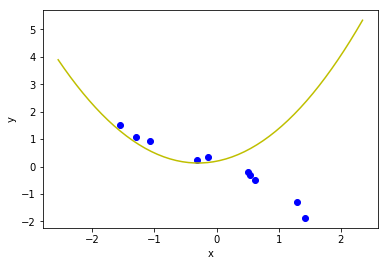

iteration number 50
loss value 1.5925286126503868
alpha 0.0001
parameter [0.74256575 0.44306129 0.19554048]


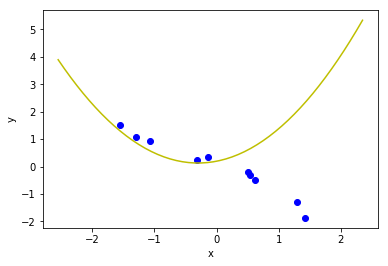

iteration number 60
loss value 1.5855952379673173
alpha 0.0001
parameter [0.74029653 0.44112594 0.19413233]


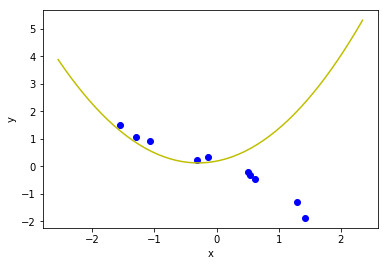

iteration number 70
loss value 1.5835943921904472
alpha 0.0001
parameter [0.73988552 0.44035921 0.19365533]


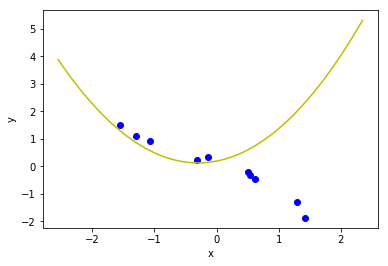

iteration number 80
loss value 1.582807209445213
alpha 0.0001
parameter [0.73988129 0.44001326 0.1932988 ]


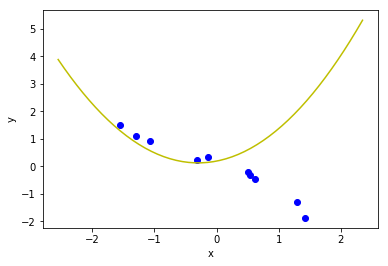

iteration number 90
loss value 1.5807088397439673
alpha 0.0001
parameter [0.73942831 0.43925744 0.19276123]


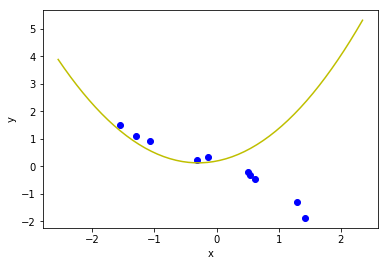

50.38546400000001
259.844780000014
[-1.29717041 -0.2971519  -1.85797484  1.51739781  0.24628247 -0.19045018
  0.34181774  0.92309401  1.08810947 -0.47395418]
[ 1.28679207  0.54154026  1.43048902 -1.55051823 -0.31359745  0.50350283
 -0.14172464 -1.07857238 -1.29693538  0.61902391]
iteration number 0
loss value 1.6159989127596694
alpha 1e-05
parameter [0.74999795 0.44999594 0.19999193]


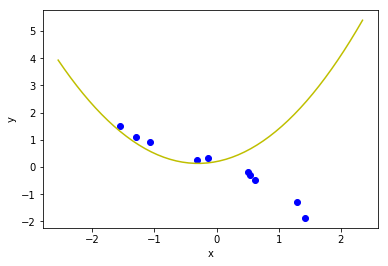

iteration number 10
loss value 1.615314413572312
alpha 1e-05
parameter [0.74978665 0.44981297 0.19983084]


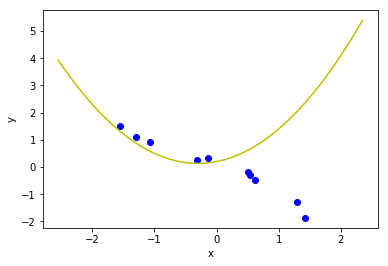

iteration number 20
loss value 1.6146329558103238
alpha 1e-05
parameter [0.74956633 0.44962135 0.19969778]


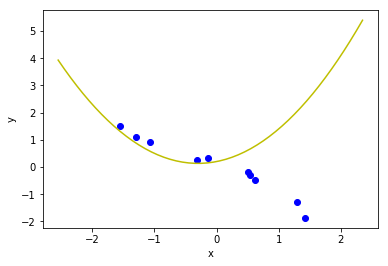

iteration number 30
loss value 1.6139589582733822
alpha 1e-05
parameter [0.74935608 0.4494308  0.19955623]


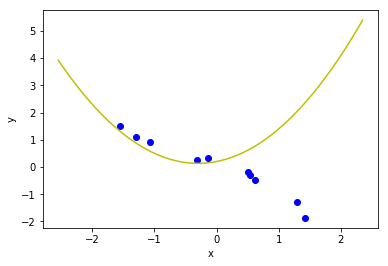

iteration number 40
loss value 1.6135774560692293
alpha 1e-05
parameter [0.74923091 0.44931399 0.19949732]


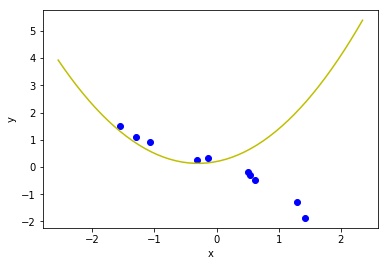

iteration number 50
loss value 1.6131243869016811
alpha 1e-05
parameter [0.74909096 0.44918411 0.19940244]


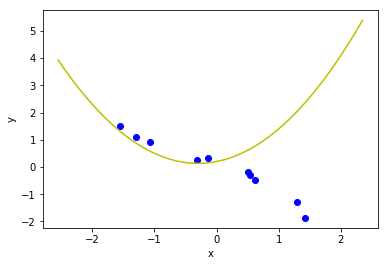

iteration number 60
loss value 1.6124481769841417
alpha 1e-05
parameter [0.74886584 0.44899989 0.19927113]


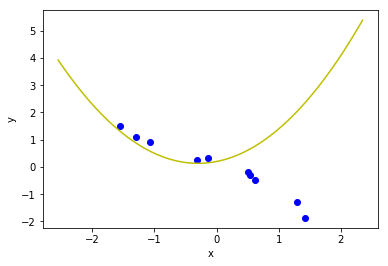

iteration number 70
loss value 1.61158415954111
alpha 1e-05
parameter [0.74857917 0.44877259 0.19909052]


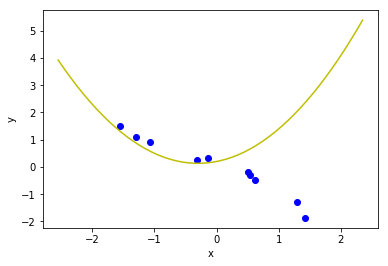

iteration number 80
loss value 1.6113088263136501
alpha 1e-05
parameter [0.74850358 0.44868175 0.19903523]


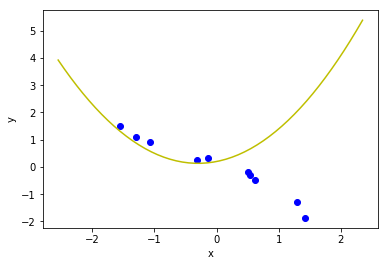

iteration number 90
loss value 1.610543312320923
alpha 1e-05
parameter [0.74826132 0.44847588 0.19886392]


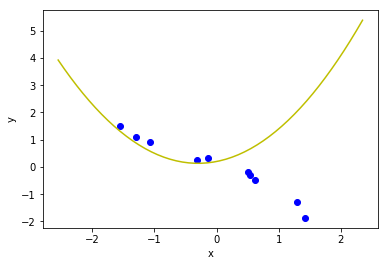

In [64]:
alphas=[1,0.1,0.01,0.001,0.0001,0.00001]

for alpha in alphas:
    normalization=True 
    initial_theta=np.asarray([0.75,0.45,0.2])
    max_iterations=100
    polynomial_regression(x,y,normalization,alpha,initial_theta,max_iterations)